***MILESTONE 1***

**Module 1**\
**Collected a structured dataset containing relevant environmental features and FWI target variable.**

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import pickle
import joblib

import math
import warnings
warnings.filterwarnings("ignore")
print("Imported Successfulley")
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', None)


Imported Successfulley


 **Loaded the dataset into a Pandas DataFrame for further analysis.**

In [2]:
#read and load dataset
df = pd.read_csv('C:\\Users\\DELL\\OneDrive\\Desktop\\FWI_Predictor\\Datasets\\FWI Dataset.csv')
print("Loaded the dataset using pandas")

Loaded the dataset using pandas


**Ensured the dataset includes Temperature, RH, Wind Speed, Rain, FFMC, DMC, ISI, Region.**\
**Verified data types, consistency, and proper formatting.**

In [3]:

df['DC'] = df['DC'].astype(str).str.replace(' ', '', regex=False)
df['FWI'] = df['FWI'].astype(str).str.replace(' ', '', regex=False)


df['DC'] = pd.to_numeric(df['DC'], errors='coerce')
df['FWI'] = pd.to_numeric(df['FWI'], errors='coerce')


In [4]:
#Info(columns, non-null count, datatypes, memory usage, range index)
print("\nBasic Information About Dataset:")
print(df.info())


Basic Information About Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       244 non-null    object 
dtypes: float64(7), int64(6), object(2)
memory usage: 28.7+ KB
None


In [5]:
#datatypes of features
print("Data Types of Each Column:")
print(df.dtypes)

Data Types of Each Column:
day              int64
month            int64
year             int64
Temperature      int64
 RH              int64
 Ws              int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region          object
dtype: object


In [6]:
#Dataset 
print("\nFirst 5 Rows of Dataset:")
print(df.head())
print("\nLast 5 Rows of Dataset:")
print(df.tail())


First 5 Rows of Dataset:
   day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC    DC  ISI  BUI  FWI    Classes    Region
0    1      6  2012           29   57   18    0.0  65.7  3.4   7.6  1.3  3.4  0.5  not fire     Bejaia
1    2      6  2012           29   61   13    1.3  64.4  4.1   7.6  1.0  3.9  0.4  not fire     Bejaia
2    3      6  2012           26   82   22   13.1  47.1  2.5   7.1  0.3  2.7  0.1  not fire     Bejaia
3    4      6  2012           25   89   13    2.5  28.6  1.3   6.9  0.0  1.7  0.0  not fire     Bejaia
4    5      6  2012           27   77   16    0.0  64.8  3.0  14.2  1.2  3.9  0.5  not fire     Bejaia

Last 5 Rows of Dataset:
     day  month  year  Temperature   RH   Ws  Rain   FFMC   DMC    DC  ISI   BUI  FWI     Classes            Region
239   26      9  2012           30   65   14    0.0  85.4  16.0  44.5  4.5  16.9  6.5       fire     Sidi-Bel Abbes
240   27      9  2012           28   87   15    4.4  41.1   6.5   8.0  0.1   6.2  0.0   not fire   

In [7]:
#stats for numerical features
print("\nStatistical Summary of Numerical Features:")
print(df.describe())


Statistical Summary of Numerical Features:
              day       month    year  Temperature          RH          Ws       Rain         FFMC         DMC          DC         ISI         BUI         FWI
count  244.000000  244.000000   244.0   244.000000  244.000000  244.000000  244.000000  244.000000  244.000000  244.000000  244.000000  244.000000  243.000000
mean    15.754098    7.500000  2012.0    32.172131   61.938525   15.504098    0.760656   77.887705   14.673361   49.288484    4.774180   16.664754    7.035391
std      8.825059    1.112961     0.0     3.633843   14.884200    2.810178    1.999406   14.337571   12.368039   47.619393    4.175318   14.204824    7.440568
min      1.000000    6.000000  2012.0    22.000000   21.000000    6.000000    0.000000   28.600000    0.700000    6.900000    0.000000    1.100000    0.000000
25%      8.000000    7.000000  2012.0    30.000000   52.000000   14.000000    0.000000   72.075000    5.800000   13.275000    1.400000    6.000000    0.700000
50

In [8]:
#Number of rows and columns
print("\nShape of Dataset:")
print(df.shape)


Shape of Dataset:
(244, 15)


**Conducted initial inspection to understand feature distributions and data quality.**

In [9]:
#duplicate values in dataset
print("\nChecking for Duplicate Rows:")
print(df.duplicated().sum())


Checking for Duplicate Rows:
0


**Module 2**\
**Checked for missing or null values and handled them appropriately.**

In [10]:
#Missing Values
print("\nChecking for Missing Values:")
print(df.isnull().sum())

#rows with missing values
rows_with_missing = df[df.isnull().any(axis=1)]
print("Rows with missing values: \n",rows_with_missing)

#no of missing values
print("\nTotal number of rows with missing values:")
print(len(rows_with_missing))


Checking for Missing Values:
day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            1
Classes        1
Region         0
dtype: int64
Rows with missing values: 
      day  month  year  Temperature   RH   Ws  Rain   FFMC   DMC     DC   ISI   BUI  FWI Classes            Region
165   14      7  2012           37   37   18    0.2  88.9  12.9  14.69  12.5  10.4  NaN       NaN  Sidi-Bel Abbes

Total number of rows with missing values:
1


**Performed outlier detection using boxplots and statistical thresholds.**

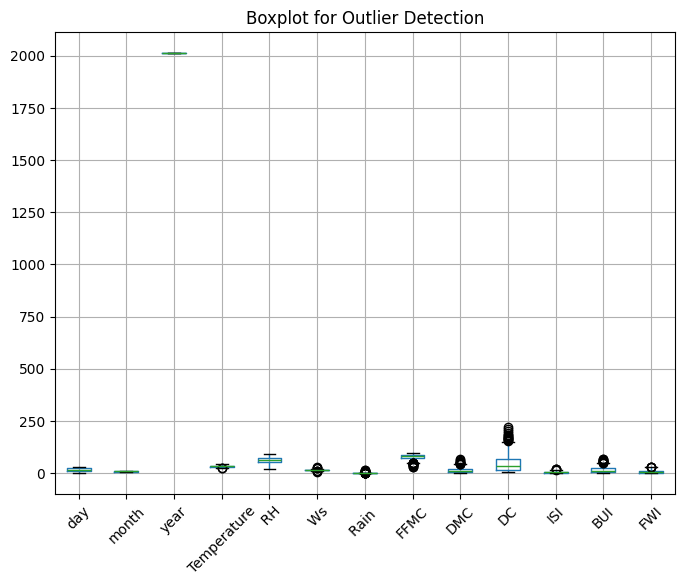


Outliers in day:
Series([], Name: day, dtype: int64)

Outliers in month:
Series([], Name: month, dtype: int64)

Outliers in year:
Series([], Name: year, dtype: int64)

Outliers in Temperature:
93     22
105    22
Name: Temperature, dtype: int64

Outliers in  RH:
Series([], Name:  RH, dtype: int64)

Outliers in  Ws:
2      22
52     22
105    26
176     9
199     9
232     8
237     6
241    29
Name:  Ws, dtype: int64

Outliers in Rain :
1       1.3
2      13.1
3       2.5
14      3.1
38      1.4
91     16.8
92      7.2
93     10.1
94      3.8
101     1.8
102     1.8
104     4.6
105     8.3
116     5.8
120     1.8
121     1.4
123     4.0
124     2.0
129     1.3
134     2.0
138     4.7
139     8.7
140     4.5
151     1.7
152     2.2
159     6.0
160     1.9
161     3.8
162     2.9
188     3.1
189     2.9
218     4.1
219     6.5
237     2.0
240     4.4
Name: Rain , dtype: float64

Outliers in FFMC:
2      47.1
3      28.6
15     36.1
16     37.3
92     46.0
93     30.5
94     42.6
104    

In [11]:
#Boxplots for Outlier Detection
plt.figure(figsize=(8, 6))
df.boxplot()
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=45)
plt.show()

#Statistical Threshold IQR Method
def detect_outliers_iqr(dataframe):
    outlier_indices = {}

    for column in dataframe.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)][column]
        outlier_indices[column] = outliers
        print(f"\nOutliers in {column}:")
        print(outliers)
    return outlier_indices

outlier_results = detect_outliers_iqr(df)

**Visualized data distributions using histograms and density plots.**

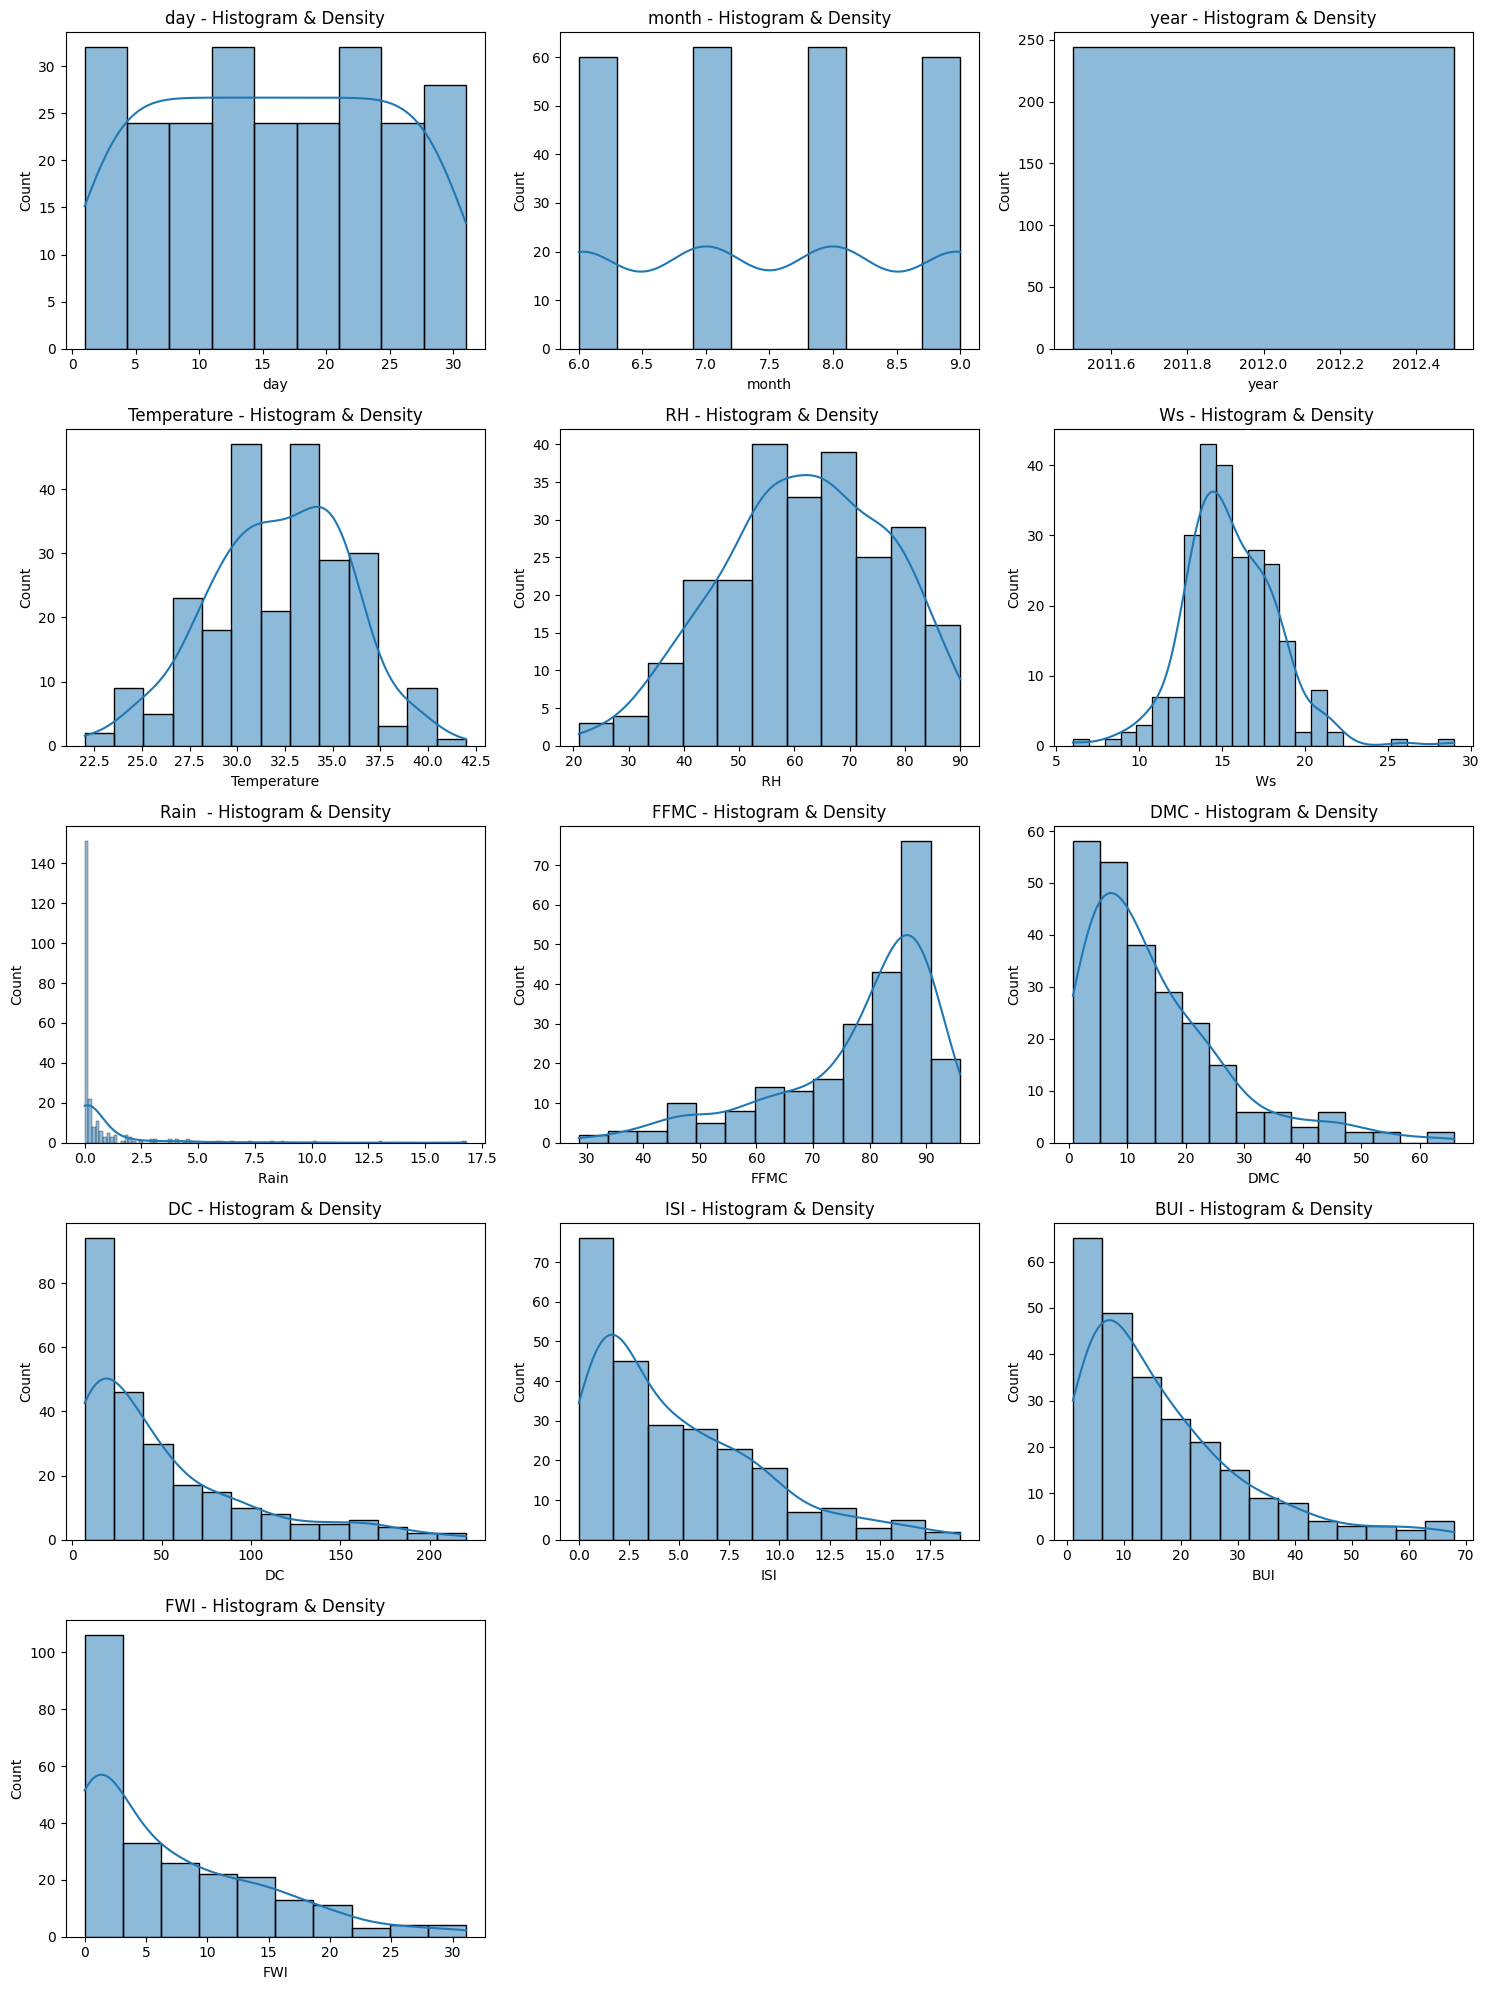

In [12]:
#Denisty+histograms for each feature
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numeric_cols)
rows = math.ceil(num_cols / 3)  

plt.figure(figsize=(15, rows * 4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} - Histogram & Density")

plt.tight_layout()
plt.show()

**Explored feature relationships using correlation matrix and scatterplots.**

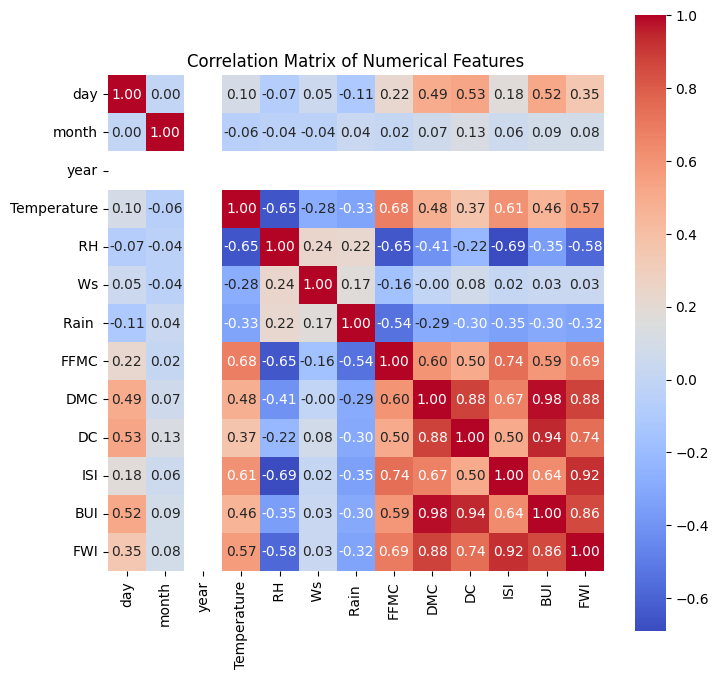

In [13]:
# correlation matrix of numerical features
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", square=True, fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

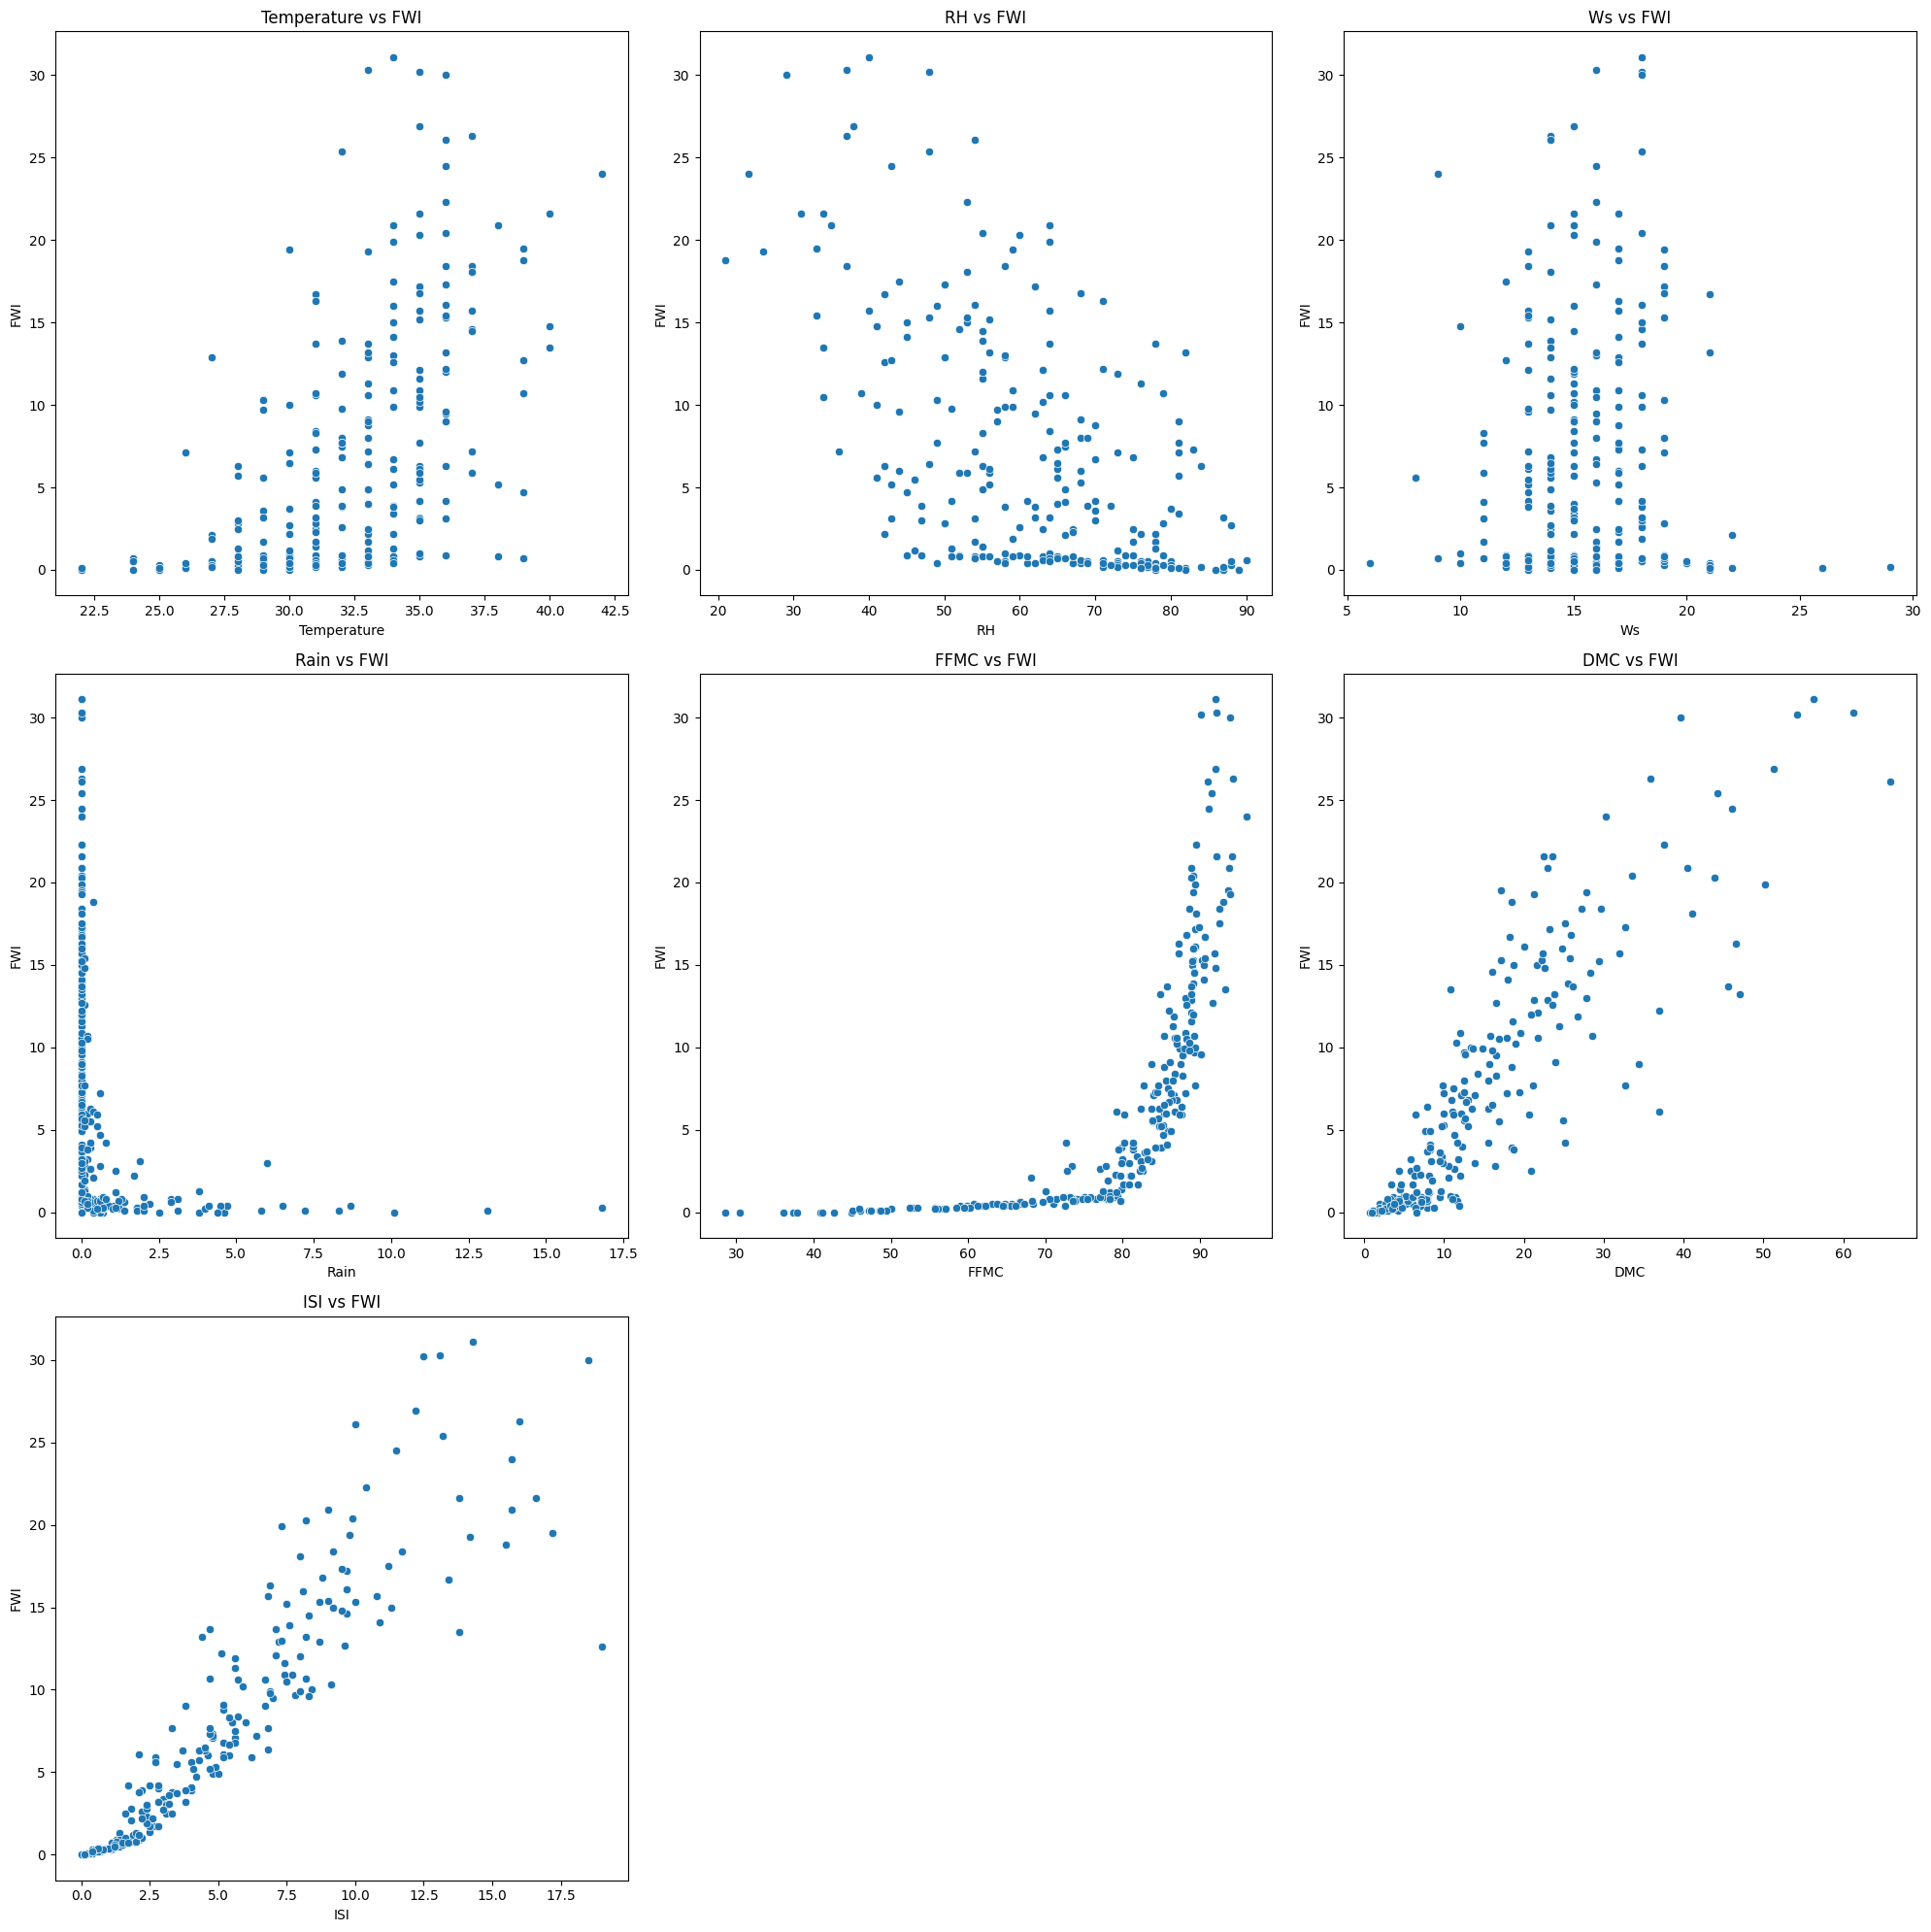

In [14]:
# Scatter Plots for Selected Features vs FWI
df.columns = df.columns.str.strip()

features_to_plot = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI']

plt.figure(figsize=(20, 20))

for i, col in enumerate(features_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=df[col], y=df['FWI'])
    plt.title(f"{col} vs FWI")
    plt.xlabel(col)
    plt.ylabel("FWI")

plt.tight_layout()
plt.show()

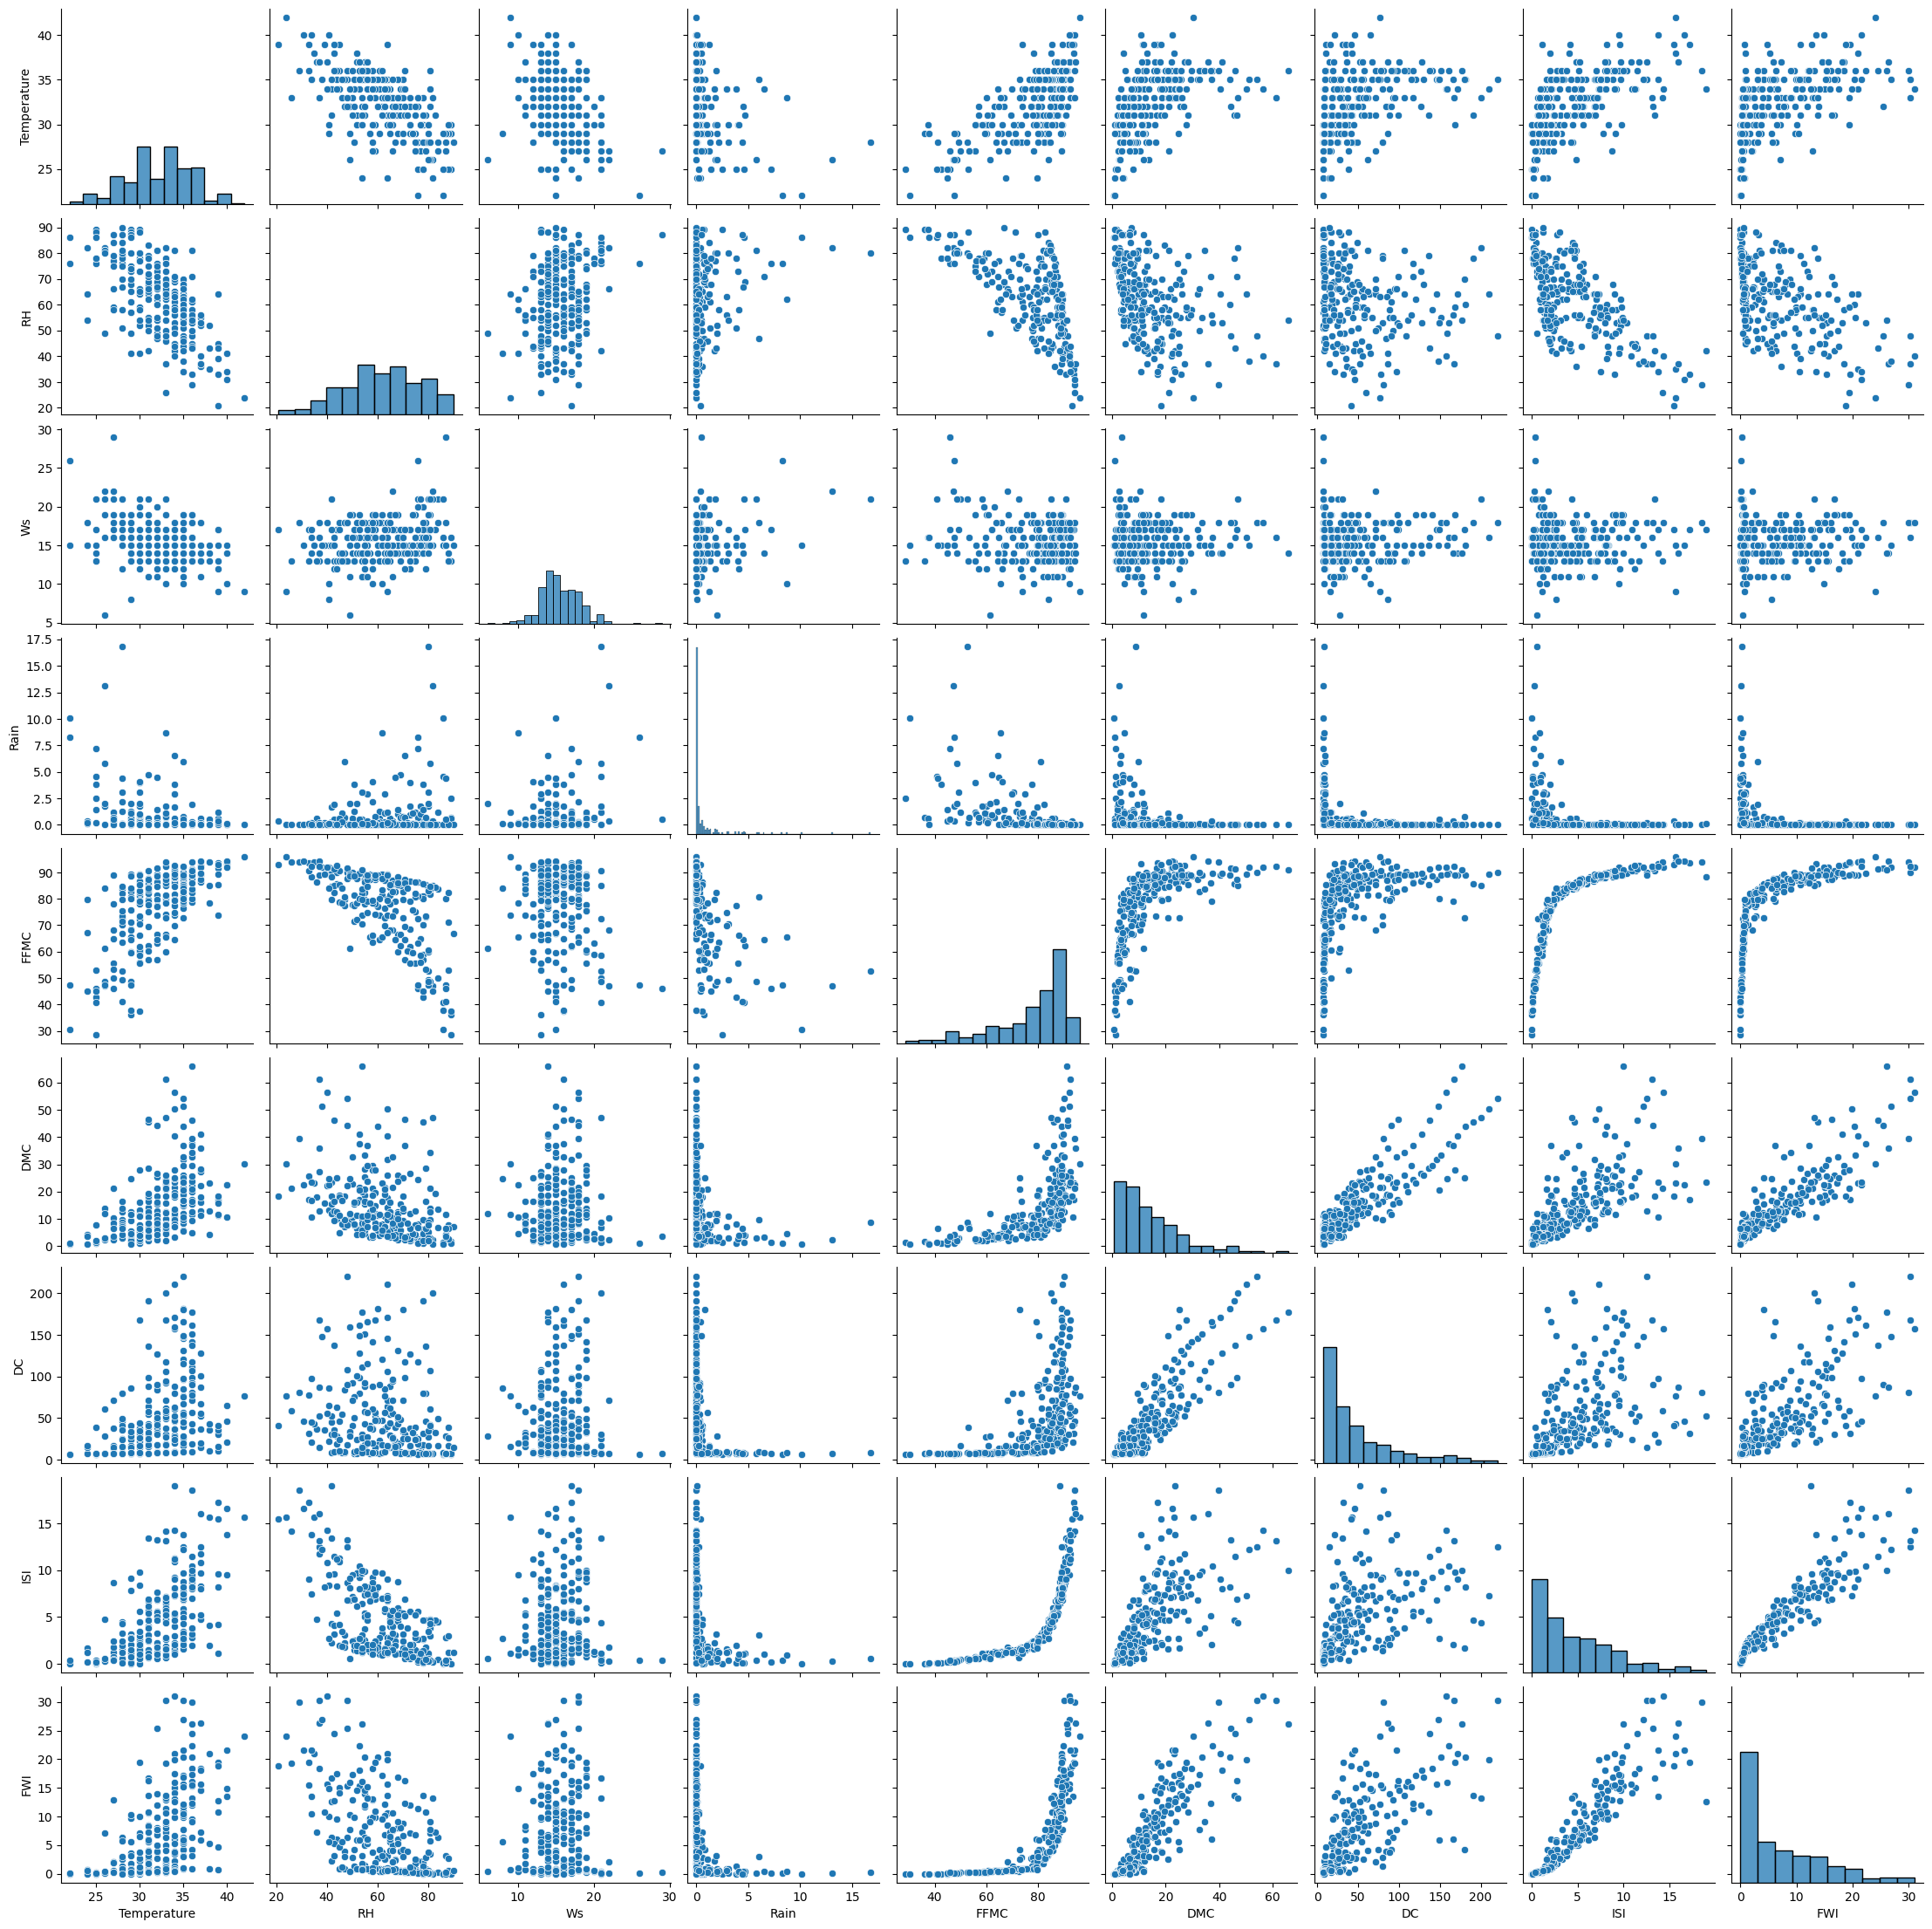

<Figure size 1500x1500 with 0 Axes>

In [15]:
#pair Plot
cols = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'FWI']
sns.pairplot(df[cols], diag_kind='hist')
plt.figure(figsize=(15, 15))
plt.show()

**Encoded categorical values like Region using label encoding or mapping.**

In [16]:
# Encoding Categorical Feature: Region
df.columns = df.columns.str.strip()
le_region = LabelEncoder()
df['Region_encoded'] = le_region.fit_transform(df['Region'])
print("Encoded Values:\n")
print(df[['Region', 'Region_encoded']].head())
print("\nRegion Mapping:")
region_mapping = dict(zip(le_region.classes_, le_region.transform(le_region.classes_)))
print(region_mapping)
df['Region_encoded'] = df['Region_encoded'].astype('category')
print(df[['Region', 'Region_encoded']].dtypes)

Encoded Values:

   Region  Region_encoded
0  Bejaia               0
1  Bejaia               0
2  Bejaia               0
3  Bejaia               0
4  Bejaia               0

Region Mapping:
{'Bejaia': 0, 'Sidi-Bel Abbes': 1}
Region              object
Region_encoded    category
dtype: object


In [17]:
df = df.drop(columns=['Classes','day', 'month', 'year','Region'])


print("Updated columns after dropping 'Classes','day', 'month', 'year', 'Region':")
print(df.columns)

Updated columns after dropping 'Classes','day', 'month', 'year', 'Region':
Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Region_encoded'],
      dtype='object')


**Saved the cleaned dataset for use in modeling.**

In [18]:
save_path = r"C:\Users\DELL\OneDrive\Desktop\FWI_Predictor\Datasets\cleaned_dataset.csv"

df.to_csv(save_path, index=False)

print("Cleaned dataset saved successfully at:")
print(save_path)

Cleaned dataset saved successfully at:
C:\Users\DELL\OneDrive\Desktop\FWI_Predictor\Datasets\cleaned_dataset.csv


In [19]:
print(df.isnull().sum())
print(df.dtypes)

Temperature       0
RH                0
Ws                0
Rain              0
FFMC              0
DMC               0
DC                0
ISI               0
BUI               0
FWI               1
Region_encoded    0
dtype: int64
Temperature          int64
RH                   int64
Ws                   int64
Rain               float64
FFMC               float64
DMC                float64
DC                 float64
ISI                float64
BUI                float64
FWI                float64
Region_encoded    category
dtype: object


***MILESTONE 2***

**MODULE 3** \
**Selected key input features most correlated with the FWI target variable** \
**Split the dataset into input features (X) and target variable (y).**

In [20]:
df1 = pd.read_csv('C:\\Users\\DELL\\OneDrive\\Desktop\\FWI_Predictor\\Datasets\\cleaned_dataset.csv')
df1 = df1.dropna(subset=['FWI'])
df1 = df1.dropna()

In [21]:
# Correlation-based feature selection 
corr = df1.corr()['FWI'].abs().sort_values(ascending=False)

threshold = 0.30  
final_features = corr[corr >= threshold].index.tolist()

if 'FWI' in final_features:
    final_features.remove('FWI')

if 'Ws' not in final_features:
    final_features.append('Ws')
print("Final Features :")
print(final_features)

X = df1[final_features]
y = df1['FWI']


Final Features :
['ISI', 'DMC', 'BUI', 'DC', 'FFMC', 'RH', 'Temperature', 'Rain', 'Ws']


**Separated data into training and testing sets using train_test_split.**

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (194, 9)
X_test: (49, 9)
y_train: (194,)
y_test: (49,)


**Normalized numerical features using StandardScaler for consistent scale.**

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
print(X_train_scaled.describe())

                ISI           DMC           BUI            DC          FFMC            RH   Temperature          Rain            Ws
count  1.940000e+02  1.940000e+02  1.940000e+02  1.940000e+02  1.940000e+02  1.940000e+02  1.940000e+02  1.940000e+02  1.940000e+02
mean  -4.921607e-17 -7.325183e-17 -9.156479e-17  9.614302e-17 -1.327689e-16  1.922860e-16 -3.021638e-16  5.379431e-17  1.671057e-16
std    1.002587e+00  1.002587e+00  1.002587e+00  1.002587e+00  1.002587e+00  1.002587e+00  1.002587e+00  1.002587e+00  1.002587e+00
min   -1.143565e+00 -1.095782e+00 -1.060395e+00 -8.894062e-01 -3.514355e+00 -2.722316e+00 -2.796647e+00 -3.801557e-01 -2.896903e+00
25%   -8.138422e-01 -7.204398e-01 -7.529531e-01 -8.216428e-01 -4.968853e-01 -6.540988e-01 -6.012013e-01 -3.801557e-01 -6.154450e-01
50%   -2.990111e-01 -3.067969e-01 -3.391536e-01 -3.633611e-01  3.835060e-01  7.978492e-02  2.220908e-01 -3.801557e-01 -2.352019e-01
75%    6.091740e-01  4.841035e-01  4.352665e-01  5.150539e-01  7.669022e-01 

**Ensured the scaler was saved as a .pkl file for deployment consistency.**

In [24]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)
with open('scaler.pkl', 'rb') as file:
    loaded_scaler = pickle.load(file)

print(type(loaded_scaler))

<class 'sklearn.preprocessing._data.StandardScaler'>


**MODULE 4** \
Trained a Ridge Regression model to handle multicollinearity in input data. \
Tuned the alpha parameter to balance bias-variance tradeoff.  \
Evaluated training and validation performance during training. \
Saved the trained model using pickle as ridge.pkl.

**Ridge Regression(parameter tuning using Grid Search CV)**

In [25]:
ridge = Ridge()
ridge_params = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

ridge_gs = GridSearchCV(
    ridge,
    ridge_params,
    cv=5,
    scoring='neg_mean_squared_error'
)

ridge_gs.fit(X_train_scaled, y_train)
ridge_model = ridge_gs.best_estimator_
with open('ridge.pkl', 'wb') as file:
    pickle.dump(ridge_model, file)
print("Ridge Regression model saved successfully.")

Ridge Regression model saved successfully.


**Linear regression**

In [26]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

with open('linear.pkl', 'wb') as file:
    pickle.dump(linear_model, file)
print("Linear Regression model saved successfully.")

Linear Regression model saved successfully.


**Decission Tree**

In [27]:
dt = DecisionTreeRegressor(random_state=42)
dt_params = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

dt_gs = GridSearchCV(
    dt,
    dt_params,
    cv=5,
    scoring='neg_mean_squared_error'
)

dt_gs.fit(X_train_scaled, y_train)
dt_model = dt_gs.best_estimator_

with open('decision_tree.pkl', 'wb') as file:
    pickle.dump(dt_model, file)
print("Decision Tree model saved successfully.")

Decision Tree model saved successfully.


**Elastic Net**

In [28]:
elastic = ElasticNet(max_iter=10000)
elastic_params = {
    'alpha': [0.01, 0.1, 1, 10],
    'l1_ratio': [0.2, 0.5, 0.8]
}

elastic_gs = GridSearchCV(
    elastic,
    elastic_params,
    cv=5,
    scoring='neg_mean_squared_error'
)

elastic_gs.fit(X_train_scaled, y_train)
elastic_model = elastic_gs.best_estimator_

with open('elasticnet.pkl', 'wb') as file:
    pickle.dump(elastic_model, file)
print("ElasticNet model saved successfully.")

ElasticNet model saved successfully.


**Lasso Regression**

In [29]:
lasso = Lasso(max_iter=10000)
lasso_params = {
    'alpha': [0.001, 0.01, 0.1, 1, 10]
}

lasso_gs = GridSearchCV(
    lasso,
    lasso_params,
    cv=5,
    scoring='neg_mean_squared_error'
)

lasso_gs.fit(X_train_scaled, y_train)
lasso_model = lasso_gs.best_estimator_

with open('lasso.pkl', 'wb') as file:
    pickle.dump(lasso_model, file)
print("Lasso Regression model saved successfully.")

Lasso Regression model saved successfully.


**Comparision**

In [30]:
models = {
    "Linear Regression": linear_model,
    "Ridge Regression": ridge_model,
    "Lasso Regression": lasso_model,
    "Elastic Net": elastic_model,
    "Decision Tree": dt_model
}
results = []

for name, model in models.items():
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    
    results.append({
        "Model": name,
        "Train MAE": mean_absolute_error(y_train, y_pred_train),
        "Test MAE": mean_absolute_error(y_test, y_pred_test),
        "Train RMSE": np.sqrt(mean_squared_error(y_train, y_pred_train)),
        "Test RMSE": np.sqrt(mean_squared_error(y_test, y_pred_test)),
        "Train R^2": r2_score(y_train, y_pred_train),
        "Test R^2": r2_score(y_test, y_pred_test)
    })

results_df = pd.DataFrame(results)
print(results_df)

               Model  Train MAE  Test MAE  Train RMSE  Test RMSE  Train R^2  Test R^2
0  Linear Regression   0.672620  0.424018    1.277897   0.596185   0.973084  0.988273
1   Ridge Regression   0.679330  0.476902    1.281513   0.751348   0.972931  0.981374
2   Lasso Regression   0.671447  0.433795    1.279102   0.623337   0.973033  0.987180
3        Elastic Net   0.687393  0.487939    1.283529   0.773424   0.972846  0.980263
4      Decision Tree   0.227491  0.837245    0.455456   1.538001   0.996581  0.921954


In [31]:
print("Model Comparison")
print("Ridge Regression       :",ridge_model.score(X_test_scaled, y_test))
print("Linear Regression      :", linear_model.score(X_test_scaled, y_test))
print("Lasso Regression       :", lasso_model.score(X_test_scaled, y_test))
print("ElasticNet Regression  :", elastic_model.score(X_test_scaled, y_test))
print("Decision Tree          :", dt_model.score(X_test_scaled, y_test))

Model Comparison
Ridge Regression       : 0.98137404846358
Linear Regression      : 0.9882726857720829
Lasso Regression       : 0.9871801679749426
ElasticNet Regression  : 0.9802634166116357
Decision Tree          : 0.9219541529317092


**MILESTONE 3**

**MODULE 5** \
• Evaluated the model using Mean Absolute Error (MAE). 


In [32]:
results_mae = []

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, y_pred)
    
    results_mae.append({
        "Model": name,
        "Train MAE": mean_absolute_error(y_train, y_pred_train),
        "Test MAE": mean_absolute_error(y_test, y_pred_test),
    })

results_m = pd.DataFrame(results_mae)
print(results_m)

               Model  Train MAE  Test MAE
0  Linear Regression   0.227491  0.837245
1   Ridge Regression   0.227491  0.837245
2   Lasso Regression   0.227491  0.837245
3        Elastic Net   0.227491  0.837245
4      Decision Tree   0.227491  0.837245


• Computed Root Mean Squared Error (RMSE) to penalize large errors.

In [33]:
results_rmse = []

for name, model in models.items():
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    
    results_rmse.append({
        "Model": name,
        "Train RMSE": np.sqrt(mean_squared_error(y_train, y_pred_train)),
        "Test RMSE": np.sqrt(mean_squared_error(y_test, y_pred_test)),
    })

results_rm = pd.DataFrame(results_rmse)
print(results_rm)

               Model  Train RMSE  Test RMSE
0  Linear Regression    1.277897   0.596185
1   Ridge Regression    1.281513   0.751348
2   Lasso Regression    1.279102   0.623337
3        Elastic Net    1.283529   0.773424
4      Decision Tree    0.455456   1.538001


• Calculated R² Score to assess variance explanation. 

In [34]:
results_r2 = []

for name, model in models.items():
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    
    results_r2.append({
        "Model": name,
        "Train R^2": r2_score(y_train, y_pred_train),
        "Test R^2": r2_score(y_test, y_pred_test)
    })

results_rsquare = pd.DataFrame(results_r2)

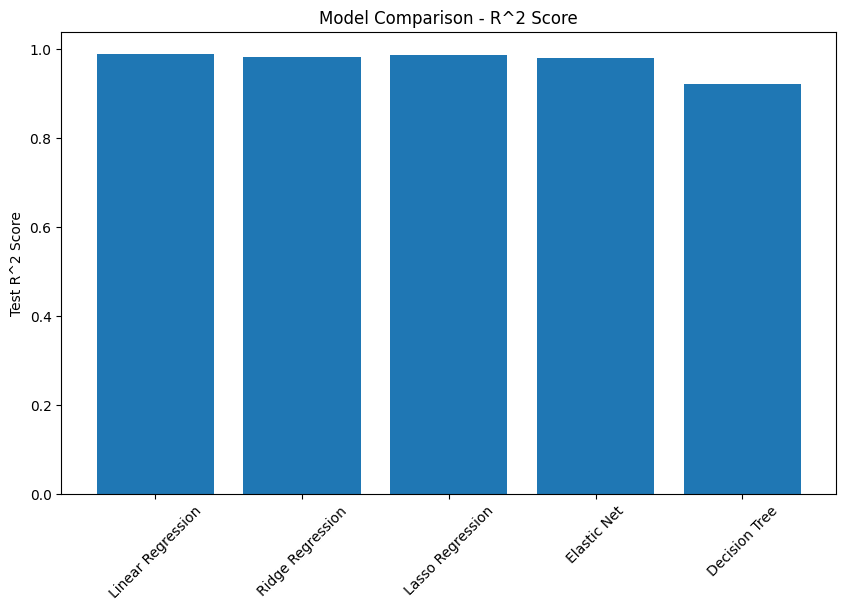

In [35]:
#R^2 Score (main selection metric)
plt.figure(figsize=(10,6))
plt.bar(results_rsquare["Model"], results_rsquare["Test R^2"])
plt.ylabel("Test R^2 Score")
plt.title("Model Comparison - R^2 Score")
plt.xticks(rotation=45)
plt.show()

• Plotted predicted vs actual values to visualize performance.  

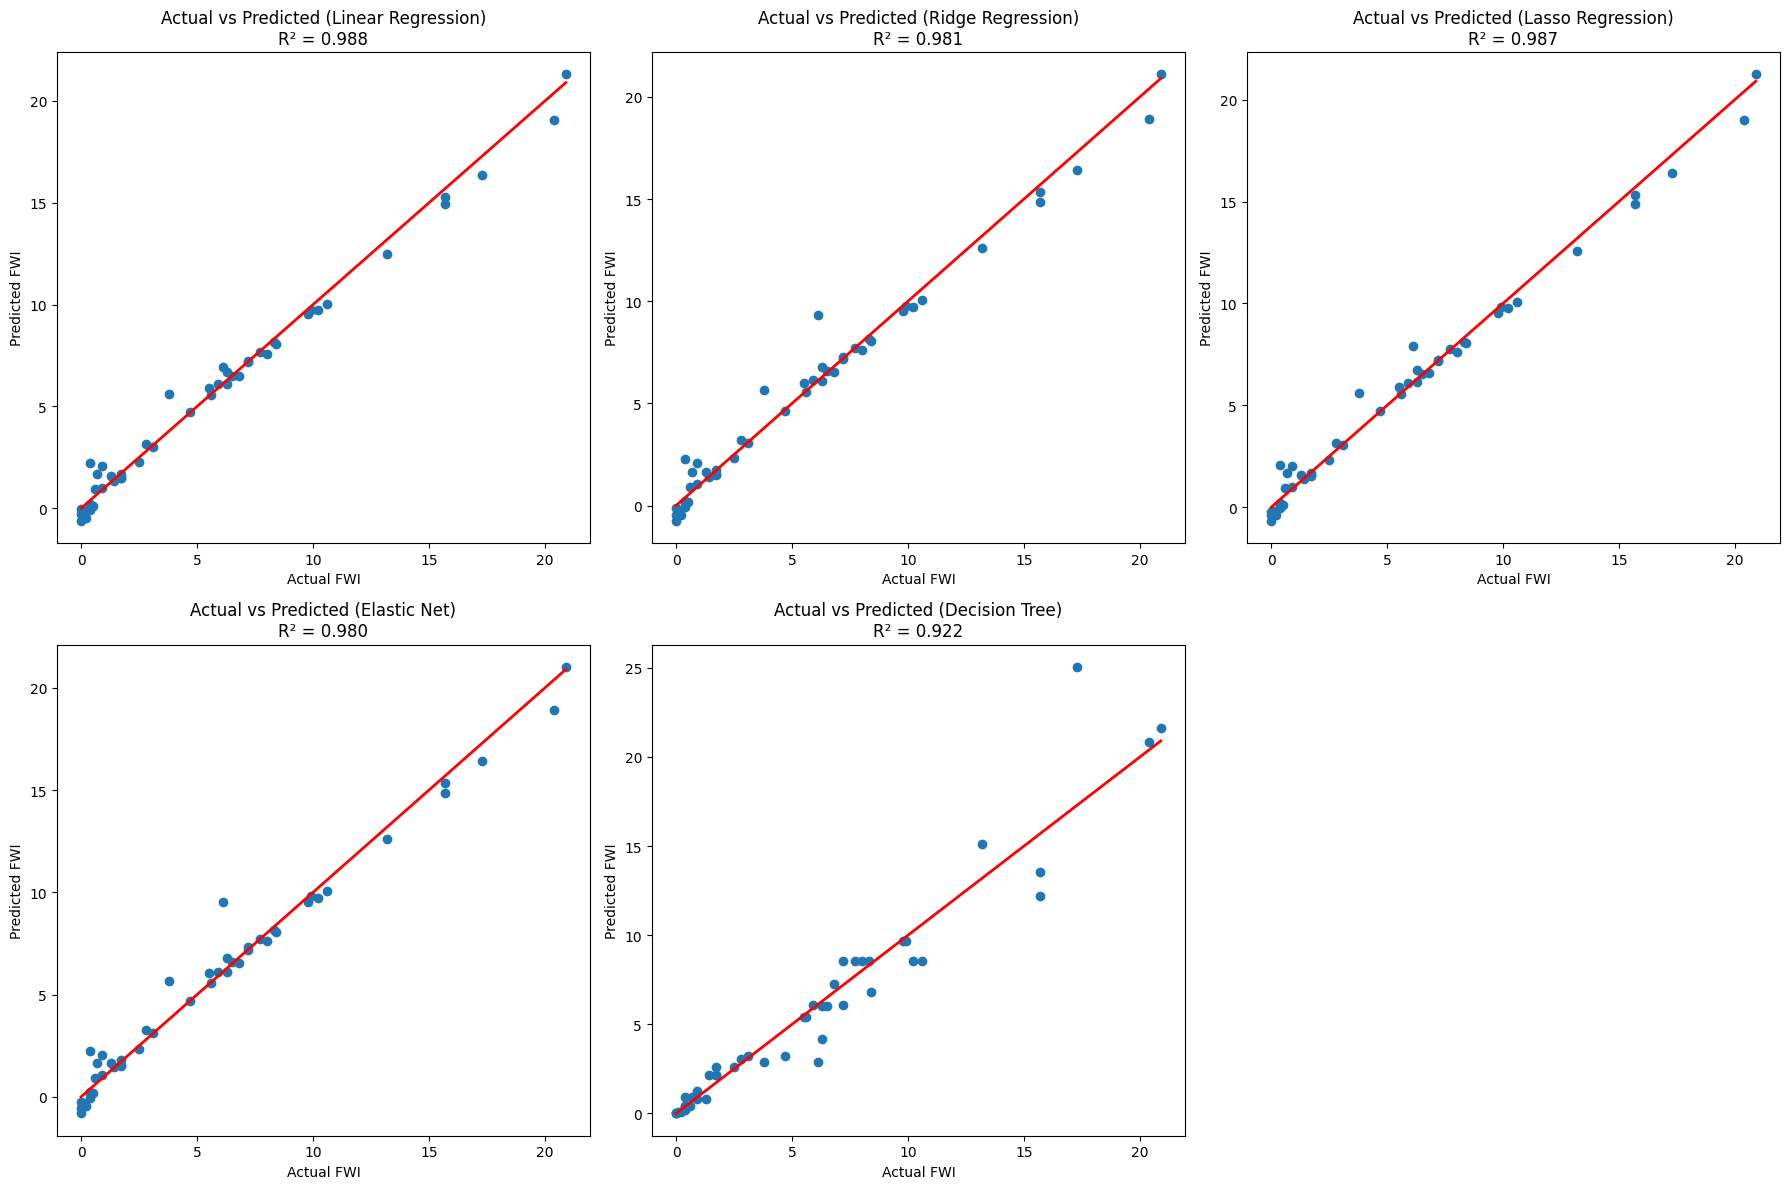

In [36]:
models = {
    "Linear Regression": linear_model,
    "Ridge Regression": ridge_model,
    "Lasso Regression": lasso_model,
    "Elastic Net": elastic_model,
    "Decision Tree": dt_model
}

plt.figure(figsize=(18, 12))

for i, (name, model) in enumerate(models.items(), 1):
    y_pred = model.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    plt.subplot(2, 3, i)
    plt.scatter(y_test, y_pred)
    plt.plot([y_test.min(), y_test.max()], 
             [y_test.min(), y_test.max()], 
             color='red', linewidth=2)

    plt.title(f"Actual vs Predicted ({name})\nR² = {r2:.3f}")
    plt.xlabel("Actual FWI")
    plt.ylabel("Predicted FWI")

plt.tight_layout()
plt.show()

• Tuned model parameters (alpha) and retrained if needed to improve metrics. (Ridge Regression)

In [37]:
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])
ridge_params = {
    'ridge__alpha': [0.01, 0.1, 1, 5, 10, 50, 100]
}
ridge_gs = GridSearchCV(
    estimator=ridge_pipeline,
    param_grid=ridge_params,
    cv=5,
    scoring='neg_mean_absolute_error'
)
ridge_gs.fit(X_train, y_train)

best_ridge = ridge_gs.best_estimator_

y_pred_ridge = best_ridge.predict(X_test)

ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
ridge_r2 = r2_score(y_test, y_pred_ridge)

print("Best Alpha:", ridge_gs.best_params_)
print("MAE:", ridge_mae)
print("RMSE:", ridge_rmse)
print("R² Score:", ridge_r2)


joblib.dump(best_ridge, 'ridge.pkl')
print("Tuned Ridge model saved successfully!")

Best Alpha: {'ridge__alpha': 0.1}
MAE: 0.44023654410579954
RMSE: 0.6386733338682478
R² Score: 0.9865415746737289
Tuned Ridge model saved successfully!
